In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

 1) Сгенерировать значение $\theta$ из равномерного распределения на отрезке [-10, 10].

In [2]:
theta = stats.uniform.rvs(-10, 10)
theta

-3.8233445991344865

2) Сгенерировать выборку $X_1, \dots , X_{1000}$ из $\mathcal{N}(\theta, 1)$

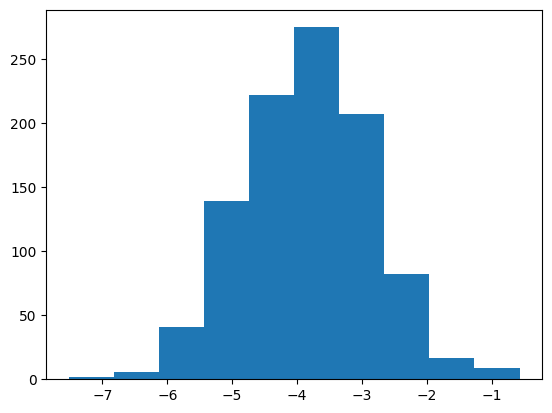

In [3]:
X = np.array(stats.norm.rvs(size=1000, loc=theta))
plt.hist(X)
plt.show()

3) Найти выборочную медиану $\hat{\theta}$  и выборочное среднее $\overline{X}$.

In [4]:
medians = [np.median(X)]
means = [np.mean(X)]
print('median', medians[0])
print('mean', means[0])

median -3.8370194055988343
mean -3.8485191820404316


4) Проделать шаги 2 - 3 еще 100 раз, получив набор из 101 значения выборочной медианы и 101 значения выборочного среднего.

In [5]:
for i in range (100):
    X = np.array(stats.norm.rvs(size=1000, loc=theta))
    medians.append(np.median(X))
    means.append(np.mean(X))

5) Построить гистограмму по 101 полученному значению величины $\hat{\theta}$ и
провести вертикальную линию, соответствующую значению $\theta$.

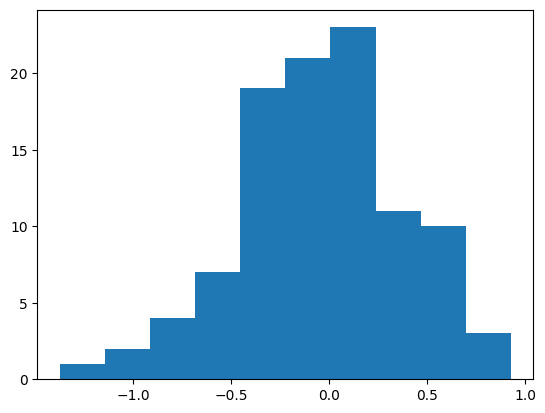

In [17]:
plt.hist((medians - theta) * np.sqrt(len(medians)))
# plt.axvline(x = theta, color='red')
plt.show()

6) Построить гистограмму, аналогичную той, которая была в предыдущем пункте, используя при этом $\overline{X}$ вместо $\hat{\theta}$.


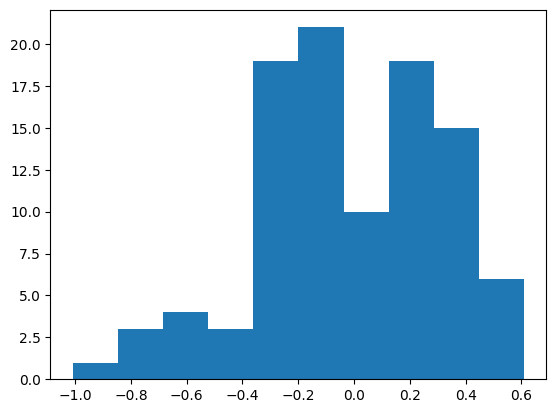

In [19]:
plt.hist((means -theta) * np.sqrt(len(means)))
# plt.axvline(x = theta, color='red')
plt.show()

7) Сделать вывод о том, какая статистика лучше оценивает параметр $\theta$

In [8]:
print(np.var(medians))
print(np.var(means))

0.0016142251131326816
0.0010230035770013215


8) Повторить шаги 1-7 еще 2 раза.

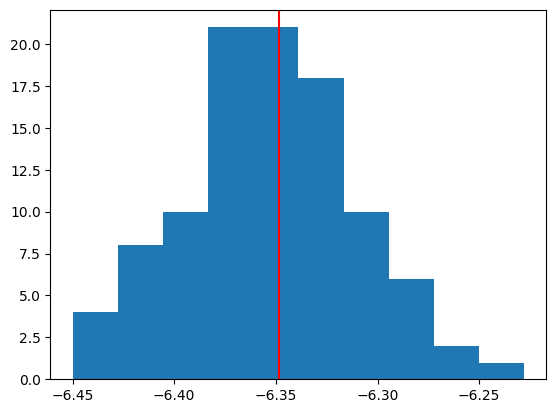

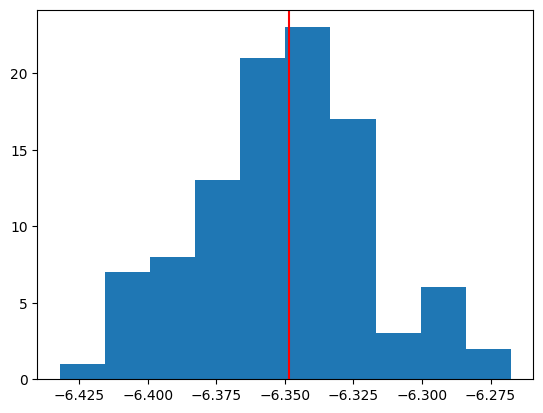

0.0017664453127753154
0.0009943462032207216


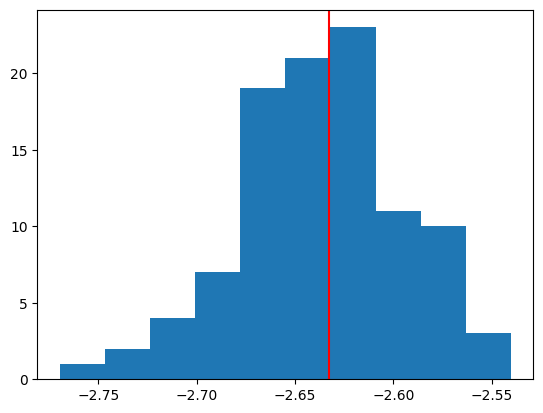

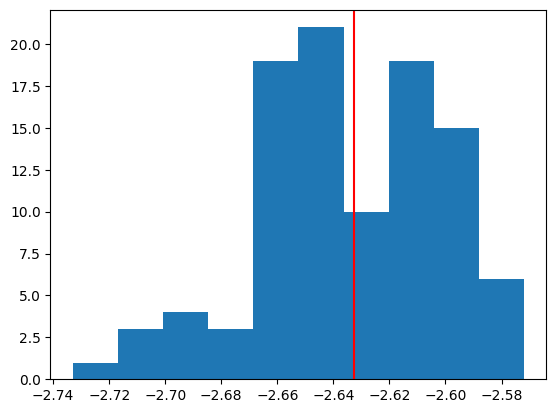

0.0017650078849760548
0.0010696823681640758


In [9]:
for i in range (2):
    theta = stats.uniform.rvs(-10, 10)
    medians = []
    means = []
    for k in range (101):
        X = np.array(stats.norm.rvs(size=1000, loc=theta))
        medians.append(np.median(X))
        means.append(np.mean(X))
    plt.hist(medians)
    plt.axvline(x = theta, color='red')
    plt.show()
    plt.hist(means)
    plt.axvline(x = theta, color='red')
    plt.show()
    print(np.var(medians))
    print(np.var(means))

9) Привести теоретическое объяснение результатов, полученных в ходе численного эксперимента.
10) Является ли $\hat\theta$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.
    По УЗБЧ, 
12) Является ли $\hat\theta$ асимптотически нормальной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построения вспомогательной гистограммы по 101 значению величины $\sqrt{n} (\hat\theta - \theta)$

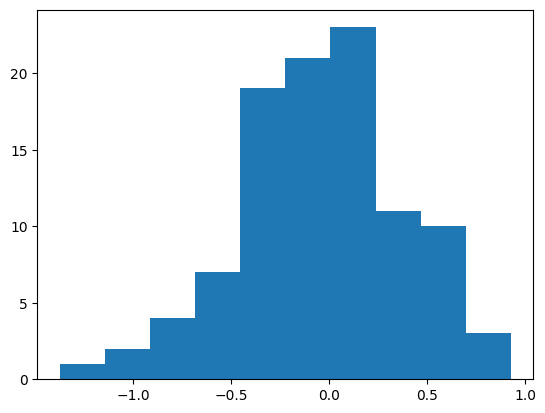

In [10]:
plt.hist(np.sqrt(101) * (medians - theta))
plt.show()

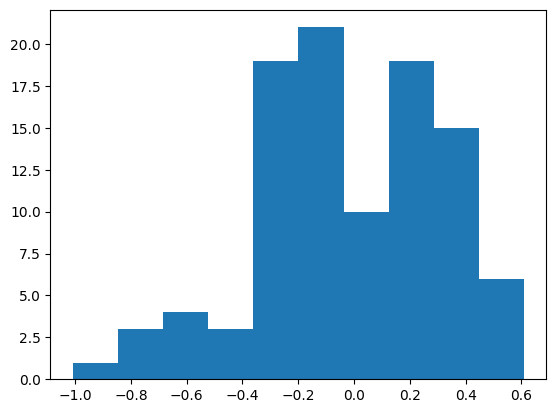

In [11]:
plt.hist(np.sqrt(101) * (means - theta))
plt.show()

### по т. о выборочной медиане, $\sqrt{n} (\mu - z_{0.5}) \sim \mathcal{N}\left(0, \frac{1}{4 f^2(z_{0.5})}\right)$
### значит, выборочная медиана -- асимптотически нормальная оценка с асимптотической дисперсией $\frac{\pi}{2}$.
### по ЦПТ, $\overline{X}$ -- асимптотически нормальная оценка с асимптотической дисперсией $1$.
### асимптотическая дисперсия $\overline{X}$ меньше, чем у медианы, значит, выборочное среднее лучше в асимптотическом подходе